In [38]:
from fastai.vision.all import *
import pandas as pd
import os

In [39]:
# Define directories
VISUALS_DIR = "visualizations_scaled/"
PROCESSED_DIR = "processed_scaled/"

In [40]:
# Load all processed CSVs and combine them
csv_files = [os.path.join(PROCESSED_DIR, f) for f in os.listdir(PROCESSED_DIR) if f.endswith(".csv")]
df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Extract required columns: log_id and attention score
df = df[["log_id", "attention"]].drop_duplicates()
df.dropna(subset=["attention"], inplace=True)

# Create image path mapping
df["image_path"] = df["log_id"].apply(lambda x: os.path.join(VISUALS_DIR, f"{x}_mouse_movement.png"))

# Ensure only images that exist are included
df = df[df["image_path"].apply(os.path.exists)]

In [41]:
df.shape

(2909, 3)

In [42]:
df.head()

,log_id,attention,image_path
0,20170223142955,4,visualizations_scaled/20170223142955_mouse_movement.png
89,20170212010344,5,visualizations_scaled/20170212010344_mouse_movement.png
103,20181001155535,4,visualizations_scaled/20181001155535_mouse_movement.png
201,20180728082322,5,visualizations_scaled/20180728082322_mouse_movement.png
245,20170131191120,5,visualizations_scaled/20170131191120_mouse_movement.png


In [43]:
from fastai.vision.all import *
from fastai.callback.tracker import CSVLogger

# Define FastAI DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader("image_path"),
    get_y=ColReader("attention"),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224)],  # Resize images to 224x224 for ResNet
)

# Create DataLoaders
dls = dblock.dataloaders(df, bs=32)

# Define and train the model
learn = vision_learner(dls, resnet18, metrics=accuracy, cbs=[CSVLogger(fname='training_log.csv')])
learn.fine_tune(5)


epoch,train_loss,valid_loss,accuracy,time
0,2.552900,2.116221,0.228916,01:40


epoch,train_loss,valid_loss,accuracy,time
0,2.161710,1.863234,0.302926,02:33
1,2.001912,1.787967,0.323580,02:18
2,1.798029,1.716915,0.339071,01:26
3,1.542656,1.654339,0.352840,02:44
4,1.356939,1.677106,0.335628,02:02


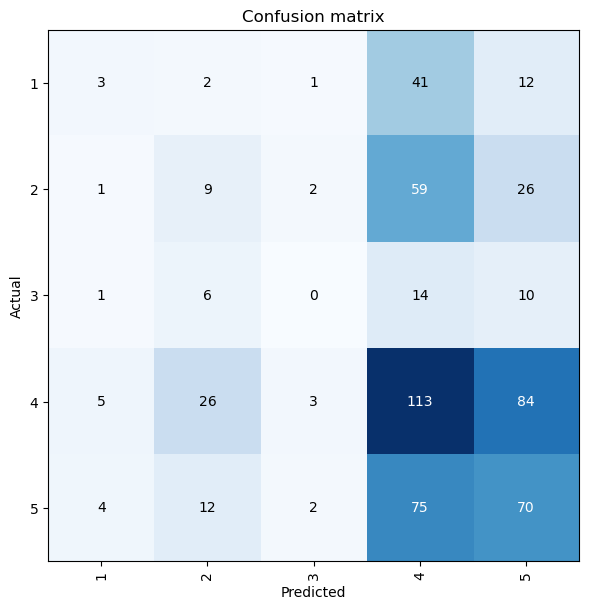

In [44]:
# Evaluate the model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6, 6))
plt.show()

   epoch  train_loss  valid_loss  accuracy   time
0      0    2.161710    1.863234  0.302926  02:33
1      1    2.001912    1.787967  0.323580  02:18
2      2    1.798029    1.716915  0.339071  01:26
3      3    1.542656    1.654339  0.352840  02:44
4      4    1.356939    1.677106  0.335628  02:02


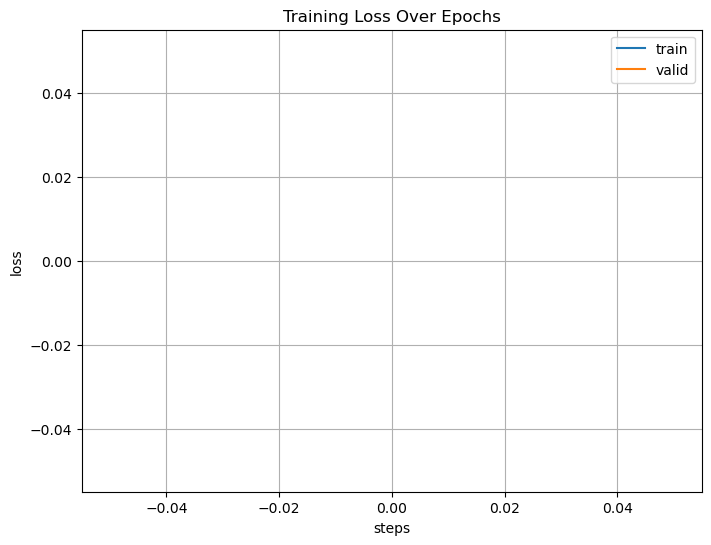

In [49]:
log_df = pd.read_csv('training_log.csv')
print(log_df.head())  # Debugging check

# Ensure training loss & accuracy plots are properly displayed
fig, ax = plt.subplots(figsize=(8, 6))
learn.recorder.plot_loss(ax=ax)
ax.set_title("Training Loss Over Epochs")
ax.grid(True)
plt.show()

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torc

SuggestedLRs(valley=3.630780702224001e-05)

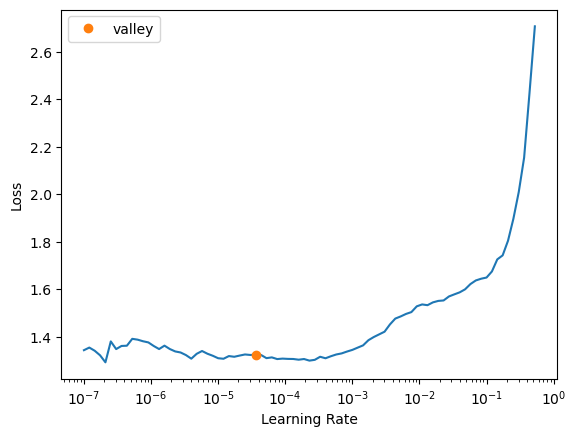

In [23]:
learn.lr_find()

In [47]:
"""
from fastai.tabular.all import *
csv_files = [os.path.join(PROCESSED_DIR, f) for f in os.listdir(PROCESSED_DIR) if f.endswith(".csv")]
df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Extract required columns
structured_features = ["speed", "acceleration", "hover_time", "total_events", "ad_position", "ad_type"]
df = df[["log_id", "attention", "ad_clicked"] + structured_features].drop_duplicates()
df.dropna(inplace=True)

# Create image path mapping
df["image_path"] = df["log_id"].apply(lambda x: os.path.join(VISUALS_DIR, f"{x}_mouse_movement.png"))

# Ensure only images that exist are included
df = df[df["image_path"].apply(os.path.exists)]

# Define ImageBlock for CNN
img_dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader("image_path"),
    get_y=ColReader("attention"),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224)],  # Resize images for ResNet
)

dls_img = img_dblock.dataloaders(df, bs=32)

# Define TabularBlock for structured data
tab_dblock = DataBlock(
    blocks=(TabularBlock(cat_names=["ad_position", "ad_type"], cont_names=["speed", "acceleration", "hover_time", "total_events"], y_names=["attention"], y_block=CategoryBlock),),
    get_x=ColReader(structured_features),
    get_y=ColReader("attention"),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
)

dls_tab = tab_dblock.dataloaders(df, bs=32)

# Define Hybrid Model (ResNet for images + Tabular NN for structured data)
vision_model = vision_learner(dls_img, resnet18, pretrained=True)
tab_model = tabular_learner(dls_tab, layers=[200, 100], metrics=accuracy)

# Combine both models into one training pipeline
learn_img = vision_learner(dls_img, resnet18, metrics=accuracy, cbs=[CSVLogger(fname='training_log_img.csv')])
learn_tab = tabular_learner(dls_tab, layers=[200, 100], metrics=accuracy, cbs=[CSVLogger(fname='training_log_tab.csv')])

learn_img.fine_tune(5)
learn_tab.fit_one_cycle(5)
"""

'\nfrom fastai.tabular.all import *\ncsv_files = [os.path.join(PROCESSED_DIR, f) for f in os.listdir(PROCESSED_DIR) if f.endswith(".csv")]\ndf_list = [pd.read_csv(f) for f in csv_files]\ndf = pd.concat(df_list, ignore_index=True)\n\n# Extract required columns\nstructured_features = ["speed", "acceleration", "hover_time", "total_events", "ad_position", "ad_type"]\ndf = df[["log_id", "attention", "ad_clicked"] + structured_features].drop_duplicates()\ndf.dropna(inplace=True)\n\n# Create image path mapping\ndf["image_path"] = df["log_id"].apply(lambda x: os.path.join(VISUALS_DIR, f"{x}_mouse_movement.png"))\n\n# Ensure only images that exist are included\ndf = df[df["image_path"].apply(os.path.exists)]\n\n# Define ImageBlock for CNN\nimg_dblock = DataBlock(\n    blocks=(ImageBlock, CategoryBlock),\n    get_x=ColReader("image_path"),\n    get_y=ColReader("attention"),\n    splitter=RandomSplitter(valid_pct=0.2, seed=42),\n    item_tfms=[Resize(224)],  # Resize images for ResNet\n)\n\ndls_i